In [78]:
pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from kneed import KneeLocator
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
Data = pd.read_csv('/content/drive/MyDrive/Working Space/Data_coffee/Data_coffee_complete_correlationWithGroup.csv')
Data

,field1,Name,NewCode,code,Groupping,Sweetness,L,A,B,Total_phenol,...,Serine,alanine,glycine,threonine,glutamic_acid,proline,histidine,arginine,leucine,phynylalanine
0,0,DC1,DC8001-1,F1,1,17.5,44.83,0.45,11.11,2.56,...,104.17,203.30,13.49,26.27,410.72,48.40,26.76,136.15,52.01,61.76
1,1,DC1,DC8001-2,F1,1,17.5,44.83,0.45,11.11,2.56,...,104.17,203.30,13.49,26.27,410.72,48.40,26.76,136.15,52.01,61.76
2,2,DC1,DC8001-3,F1,1,17.5,44.83,0.45,11.11,2.56,...,104.17,203.30,13.49,26.27,410.72,48.40,26.76,136.15,52.01,61.76
3,3,DC1,DC8001-4,F1,1,17.5,44.83,0.45,11.11,2.56,...,104.17,203.30,13.49,26.27,410.72,48.40,26.76,136.15,52.01,61.76
4,4,DC1,DC8001-5,F1,1,17.5,44.83,0.45,11.11,2.56,...,104.17,203.30,13.49,26.27,410.72,48.40,26.76,136.15,52.01,61.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,221,BK1,BK-10001-2,F48,6,15.0,49.48,1.25,11.67,0.94,...,185.40,417.97,25.97,44.10,457.11,63.88,37.02,381.68,74.05,152.09
65,222,BK1,BK-10001-3,F48,6,15.0,49.48,1.25,11.67,0.94,...,185.40,417.97,25.97,44.10,457.11,63.88,37.02,381.68,74.05,152.09
66,225,BK3,BK-10003-1,F50,6,17.0,52.42,0.81,12.40,1.99,...,187.75,396.23,36.27,45.11,317.60,67.28,52.47,295.35,68.86,139.61
67,226,BK3,BK-10003-2,F50,6,17.0,52.42,0.81,12.40,1.99,...,187.75,396.23,36.27,45.11,317.60,67.28,52.47,295.35,68.86,139.61


In [50]:
feature = Data.iloc[:,5:].columns
feature

Index(['Sweetness', 'L', 'A', 'B', 'Total_phenol', 'Total_Flavonoid',
       'Antioxidant', 'caffeic_acid', 'Theobromine', 'K', 'Fe', 'Zn', 'Na',
       'sucrose_maltose', 'fluctose_arabinise', 'Lactic_acid', 'Malic_acid',
       'Propionic_acid', 'Quinic_acid', 'Apartic_acid', 'Serine', 'alanine',
       'glycine', 'threonine', 'glutamic_acid', 'proline', 'histidine',
       'arginine', 'leucine', 'phynylalanine'],
      dtype='object')

In [51]:
feature_corr = Data[feature].corr()
feature_uncorr = feature_corr.style.applymap(lambda e: 'background-color: yellow' if np.abs(e) <= 0.05 else 'background-color: white')
feature_uncorr

,Sweetness,L,A,B,Total_phenol,Total_Flavonoid,Antioxidant,caffeic_acid,Theobromine,K,Fe,Zn,Na,sucrose_maltose,fluctose_arabinise,Lactic_acid,Malic_acid,Propionic_acid,Quinic_acid,Apartic_acid,Serine,alanine,glycine,threonine,glutamic_acid,proline,histidine,arginine,leucine,phynylalanine
Sweetness,1.000000,-0.552677,-0.459398,-0.375935,0.100394,0.512360,-0.653692,-0.771208,0.132393,-0.166888,0.491743,-0.188526,0.322384,0.440534,0.209602,-0.521047,0.679799,0.483801,0.440097,0.069506,-0.263308,-0.457166,-0.585155,-0.480747,0.796020,-0.455373,-0.283672,-0.346404,-0.518035,-0.462341
L,-0.552677,1.000000,0.736782,0.855970,0.034785,-0.088611,0.727403,0.494378,-0.659167,0.281987,-0.826799,-0.070507,-0.112891,-0.785085,-0.724650,0.573523,-0.291168,-0.354291,-0.133389,0.075767,-0.023217,0.151388,0.707191,0.111233,-0.751899,0.071911,0.351450,0.144081,0.127863,0.151947
A,-0.459398,0.736782,1.000000,0.548732,0.217425,-0.035986,0.566567,0.551825,-0.772327,0.355249,-0.677421,-0.230599,-0.384136,-0.726978,-0.620067,0.524475,-0.295556,-0.189547,-0.335066,0.374259,0.309156,0.472500,0.837245,0.426016,-0.520495,0.449758,0.518953,0.396495,0.533893,0.379992
B,-0.375935,0.855970,0.548732,1.000000,0.020169,-0.084454,0.470224,0.456570,-0.403792,0.367564,-0.666567,-0.051027,0.002367,-0.777991,-0.714439,0.393204,-0.218786,-0.440838,-0.224093,-0.023502,-0.225910,0.042923,0.603464,0.025251,-0.744277,0.054642,0.280394,0.048754,0.123144,-0.008063
Total_phenol,0.100394,0.034785,0.217425,0.020169,1.000000,0.785574,0.026593,-0.115770,-0.424352,0.057392,0.189072,0.392398,0.460048,0.046179,0.199774,-0.356616,0.444477,0.441051,0.036784,-0.326864,-0.352627,-0.368477,0.082655,-0.300031,-0.082326,-0.104874,-0.125219,-0.614214,0.005474,-0.498566
Total_Flavonoid,0.512360,-0.088611,-0.035986,-0.084454,0.785574,1.000000,-0.236087,-0.363182,-0.451829,-0.315149,0.311644,0.210569,0.604402,0.275609,0.260217,-0.591022,0.888909,0.767405,0.503749,-0.459605,-0.670414,-0.759034,-0.373381,-0.755548,0.277442,-0.631016,-0.529518,-0.838144,-0.544031,-0.835588
Antioxidant,-0.653692,0.727403,0.566567,0.470224,0.026593,-0.236087,1.000000,0.636962,-0.557886,0.126964,-0.388554,-0.085043,-0.476353,-0.330278,-0.236086,0.674514,-0.452910,-0.457620,-0.453434,-0.065513,0.241429,0.330417,0.612025,0.315209,-0.799542,0.254736,0.332657,0.276384,0.311569,0.305951
caffeic_acid,-0.771208,0.494378,0.551825,0.456570,-0.115770,-0.363182,0.636962,1.000000,-0.338660,-0.062289,-0.241304,-0.085968,-0.561795,-0.288818,-0.097755,0.458475,-0.409044,-0.358504,-0.525869,-0.223058,0.096325,0.365239,0.466169,0.341717,-0.783973,0.347958,0.058489,0.337311,0.487368,0.267253
Theobromine,0.132393,-0.659167,-0.772327,-0.403792,-0.424352,-0.451829,-0.557886,-0.338660,1.000000,0.114325,0.382259,0.115973,0.102354,0.327461,0.299672,-0.299754,-0.251984,-0.270861,-0.094030,0.030766,0.093753,0.084647,-0.410014,0.146667,0.325519,0.133696,-0.028038,0.098236,0.008433,0.150089
K,-0.166888,0.281987,0.355249,0.367564,0.057392,-0.315149,0.126964,-0.062289,0.114325,1.000000,-0.470293,-0.332664,-0.219585,-0.692589,-0.670646,0.135208,-0.575339,-0.704865,-0.617733,0.591268,0.370950,0.610539,0.679707,0.627180,-0.291127,0.663277,0.859472,0.429482,0.531622,0.525078


In [52]:
X = Data[feature]
scaler = StandardScaler()
X_t = scaler.fit_transform(X)

In [53]:
pca = PCA(n_components=X_t.shape[1])

pca.fit_transform(X_t)
print(f'explained_variance (n_components={pca.n_components}) = {pca.explained_variance_}') # Eigenvalues
print(f'explained_variance_ratio (n_components={pca.n_components}) = {pca.explained_variance_ratio_}')
print(f'sum explained_variance_ratio = {np.sum(pca.explained_variance_ratio_)}')

explained_variance (n_components=30) = [1.47956828e+01 5.58744988e+00 3.11831855e+00 2.14644707e+00
 1.91083164e+00 1.72239354e+00 7.22569906e-01 4.37483079e-01
 2.18378189e-31 8.87999358e-32 6.23939476e-32 6.23939476e-32
 6.23939476e-32 6.23939476e-32 6.23939476e-32 6.23939476e-32
 6.23939476e-32 6.23939476e-32 6.23939476e-32 6.23939476e-32
 6.23939476e-32 6.23939476e-32 6.23939476e-32 6.23939476e-32
 6.23939476e-32 6.23939476e-32 6.23939476e-32 6.23939476e-32
 6.23939476e-32 6.84972389e-33]
explained_variance_ratio (n_components=30) = [4.86041754e-01 1.83549078e-01 1.02437518e-01 7.05113046e-02
 6.27712809e-02 5.65810438e-02 2.37365959e-02 1.43714248e-02
 7.17377627e-33 2.91709934e-33 2.04965625e-33 2.04965625e-33
 2.04965625e-33 2.04965625e-33 2.04965625e-33 2.04965625e-33
 2.04965625e-33 2.04965625e-33 2.04965625e-33 2.04965625e-33
 2.04965625e-33 2.04965625e-33 2.04965625e-33 2.04965625e-33
 2.04965625e-33 2.04965625e-33 2.04965625e-33 2.04965625e-33
 2.04965625e-33 2.25015084e-34

In [54]:
def scree_plot(X, n_components, with_cumulative=False, show_data_label=False, figsize=(10, 7)):
    '''
    PCA scree plot with cumulative
    '''
    scaler = StandardScaler()
    X_t=scaler.fit_transform(X)

    max_components = min(X.shape)
    x=np.arange(1, n_components+1)
    pca = PCA(n_components=max_components)
    pca.fit_transform(X_t)
    y1=pca.explained_variance_ratio_[:n_components]
    y2=np.cumsum(pca.explained_variance_ratio_)[:n_components]
    
    plt.figure(figsize=figsize)
    
    if n_components > 20:
        marker = None
    else:
        marker = 'o'
    if with_cumulative:
        plt.plot(x, y2, linestyle='--', marker=marker, label='cumulative', color='salmon')
        
    plt.plot(x, y1, linestyle='-', marker=marker, label='individual', color='deepskyblue')
    plt.title('explained variance ratio')
    plt.xlabel('# of components')
    plt.ylabel('proportion of variance explained')
    plt.legend()
    if with_cumulative:
        [plt.axhline(y=xl, color='.7', linestyle='--') for xl in [.8, .9, .95, 1]]
    plt.grid(axis='x')

    if show_data_label:
        for n, v, cv in zip(np.nditer(x, flags=['refs_ok']), 
                            np.nditer(y1, flags=['refs_ok']),
                            np.nditer(y2, flags=['refs_ok'])):
                plt.text(n+.02, v+.02, f'{v*100:.2f}%', fontsize=10)
                if with_cumulative:
                    plt.text(n+.02, cv+.02, f'{cv*100:.2f}%', fontsize=10)

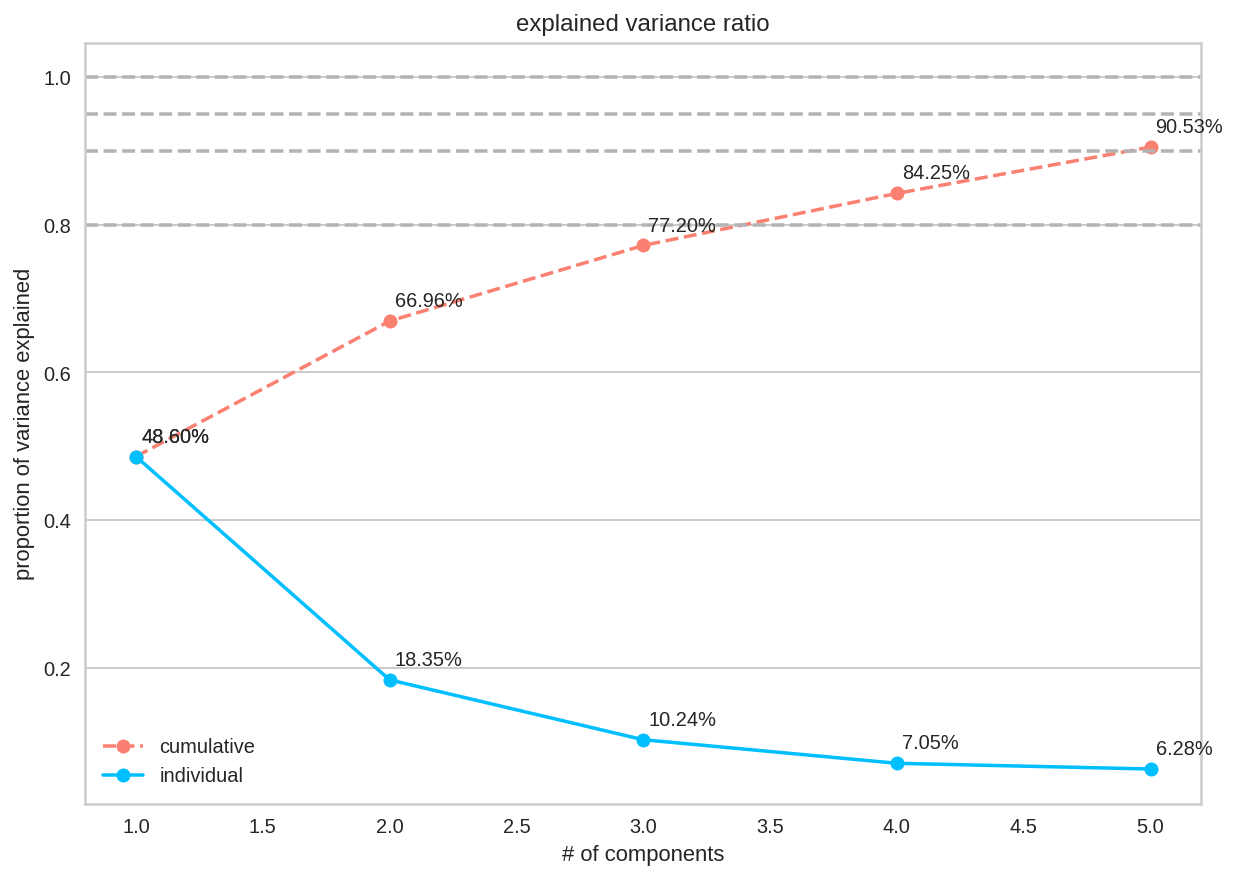

In [55]:
scree_plot(X, 5, True, True)

In [56]:
dpc=pd.DataFrame(pca.components_.T, 
                  index=Data[feature].columns,
                  columns=[f'PC{n+1}' for n in range(pca.components_.shape[0])]).round(4) #Eigenvectors
# dpc
dpc.style.applymap(lambda e: 'background-color: yellow' if np.abs(e) > .5 else 'background-color: white')

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
Sweetness,-0.160600,-0.139200,0.297200,-0.051300,0.103200,-0.209500,0.248100,0.485500,0.136300,-0.350000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.609100
L,0.131500,0.353300,0.037800,0.129000,0.059800,0.033200,0.118600,-0.072500,-0.138300,0.116900,0.318200,0.089900,0.062700,0.002000,-0.119800,0.008100,-0.030600,0.095400,0.071800,0.044000,-0.025500,-0.240500,-0.062400,-0.311500,0.006900,-0.307900,-0.573900,-0.022600,0.084400,-0.216700
A,0.167600,0.237600,0.070300,-0.221700,0.250500,-0.047900,-0.232300,0.011000,0.102000,0.221200,-0.048400,-0.196500,-0.104400,-0.119100,0.068300,-0.115400,-0.142300,-0.209500,-0.116900,0.017700,-0.069800,-0.283700,0.464500,0.067300,-0.013800,0.160200,-0.000400,0.393400,-0.057500,-0.176700
B,0.106000,0.328700,0.053600,0.173700,-0.172200,-0.078400,-0.013700,0.487600,-0.091100,0.130000,-0.213100,0.112400,-0.000600,-0.332200,-0.050100,0.420100,0.158100,0.095300,-0.256000,0.113500,-0.140000,-0.014100,-0.095600,0.052600,0.048000,-0.003500,0.048600,0.121500,0.005700,0.194200
Total_phenol,-0.083200,0.180700,0.024100,-0.560700,-0.149800,-0.002600,0.077000,-0.116000,-0.155600,-0.309200,0.272700,0.027600,0.073400,-0.285900,0.188600,0.106400,0.042400,0.113000,0.033900,0.245900,0.170400,-0.055300,-0.017500,0.226000,-0.283000,0.111800,-0.070300,-0.009400,0.089400,0.096900
Total_Flavonoid,-0.191800,0.177500,0.121100,-0.318100,0.056800,-0.112200,0.063700,-0.039100,0.190500,0.160100,-0.172500,0.210800,0.174600,0.007700,-0.339900,0.005100,-0.050200,0.403000,0.217200,-0.091000,-0.071800,-0.087800,0.207700,-0.000200,0.217400,0.065200,0.037600,-0.265600,-0.323100,0.089600
Antioxidant,0.144300,0.214400,-0.252700,-0.006800,0.143600,-0.027300,0.507800,-0.232200,0.280600,-0.063900,-0.040700,-0.232300,-0.370800,0.068400,-0.144500,0.055900,0.029000,0.237400,-0.273900,0.131200,-0.024500,0.005700,-0.028200,0.006100,-0.044600,-0.078400,0.237500,-0.028300,0.111100,-0.054800
caffeic_acid,0.130900,0.160800,-0.384900,0.028100,0.094800,-0.094100,-0.392800,0.146400,-0.028800,-0.047500,-0.056400,-0.017300,0.048600,-0.186400,-0.009500,-0.288400,-0.056900,0.061000,-0.039900,0.087100,0.082100,0.016300,-0.121900,0.134500,-0.218400,-0.342300,0.173300,-0.349700,-0.242600,-0.235400
Theobromine,-0.026800,-0.314000,-0.032100,0.213600,-0.418700,0.078300,-0.090200,0.031000,0.140600,0.080700,0.107200,0.054700,-0.057400,0.043600,-0.100600,-0.140000,0.217800,0.248100,-0.242500,0.207900,0.164900,-0.473900,0.253700,0.136900,-0.047700,0.123400,-0.074800,-0.106700,0.032600,-0.079600
K,0.174800,-0.007100,0.259000,-0.119800,-0.359700,-0.182400,0.116800,-0.133700,0.143100,-0.078900,-0.166400,-0.109100,-0.099100,-0.198600,0.053900,-0.158300,0.097300,-0.137900,-0.170600,-0.484100,0.141100,-0.098500,-0.116300,-0.196100,-0.168800,-0.191700,-0.085400,0.021800,-0.301800,0.112100


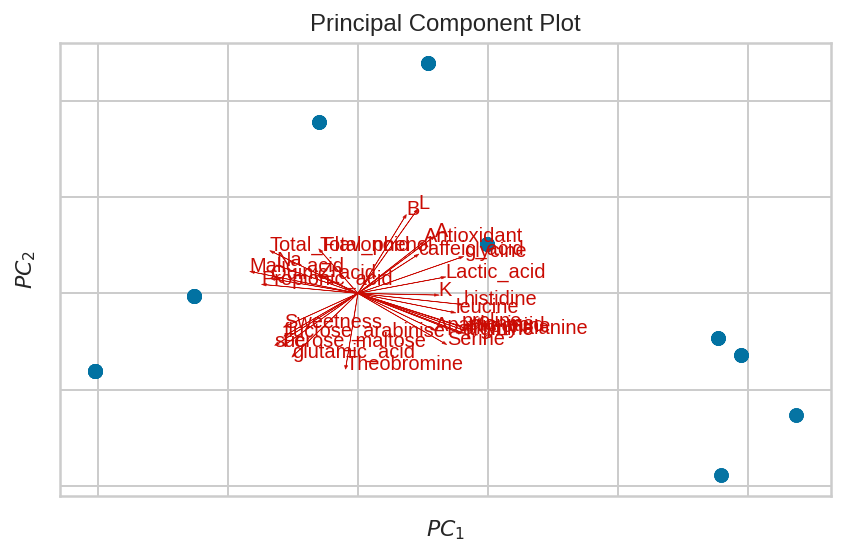

In [57]:
import yellowbrick.features as yb
visualizer = yb.PCA(scale=True, proj_features=True, proj_dim=2)
visualizer.fit_transform(X)
visualizer.show()

In [58]:
pca = PCA(n_components=2)

X_pca=pca.fit_transform(X_t)

X_pca

array([[-4.04416374, -1.61856457],
       [-4.04416374, -1.61856457],
       [-4.04416374, -1.61856457],
       [-4.04416374, -1.61856457],
       [-4.04416374, -1.61856457],
       [-4.04416374, -1.61856457],
       [-4.04416374, -1.61856457],
       [-4.04416374, -1.61856457],
       [-4.04416374, -1.61856457],
       [-4.04416374, -1.61856457],
       [-4.04416374, -1.61856457],
       [-4.04416374, -1.61856457],
       [-4.04416374, -1.61856457],
       [-4.04416374, -1.61856457],
       [-4.04416374, -1.61856457],
       [-4.04416374, -1.61856457],
       [-4.04416374, -1.61856457],
       [-4.04416374, -1.61856457],
       [-4.04416374, -1.61856457],
       [-4.04416374, -1.61856457],
       [-2.52606248, -0.06438819],
       [-2.52606248, -0.06438819],
       [-2.52606248, -0.06438819],
       [-2.52606248, -0.06438819],
       [-2.52606248, -0.06438819],
       [-2.52606248, -0.06438819],
       [-2.52606248, -0.06438819],
       [-2.52606248, -0.06438819],
       [-2.52606248,

In [59]:
dd=pd.concat([pd.DataFrame(pca.transform(X_t), 
                           columns=[f'PC{n}' for n in range(1, pca.n_components_ + 1)]), 
              Data[['Groupping']]], axis = 'columns')

dd

,PC1,PC2,Groupping
0,-4.044164,-1.618565,1
1,-4.044164,-1.618565,1
2,-4.044164,-1.618565,1
3,-4.044164,-1.618565,1
4,-4.044164,-1.618565,1
...,...,...,...
64,5.593620,-3.780113,6
65,5.593620,-3.780113,6
66,6.743759,-2.533371,6
67,6.743759,-2.533371,6


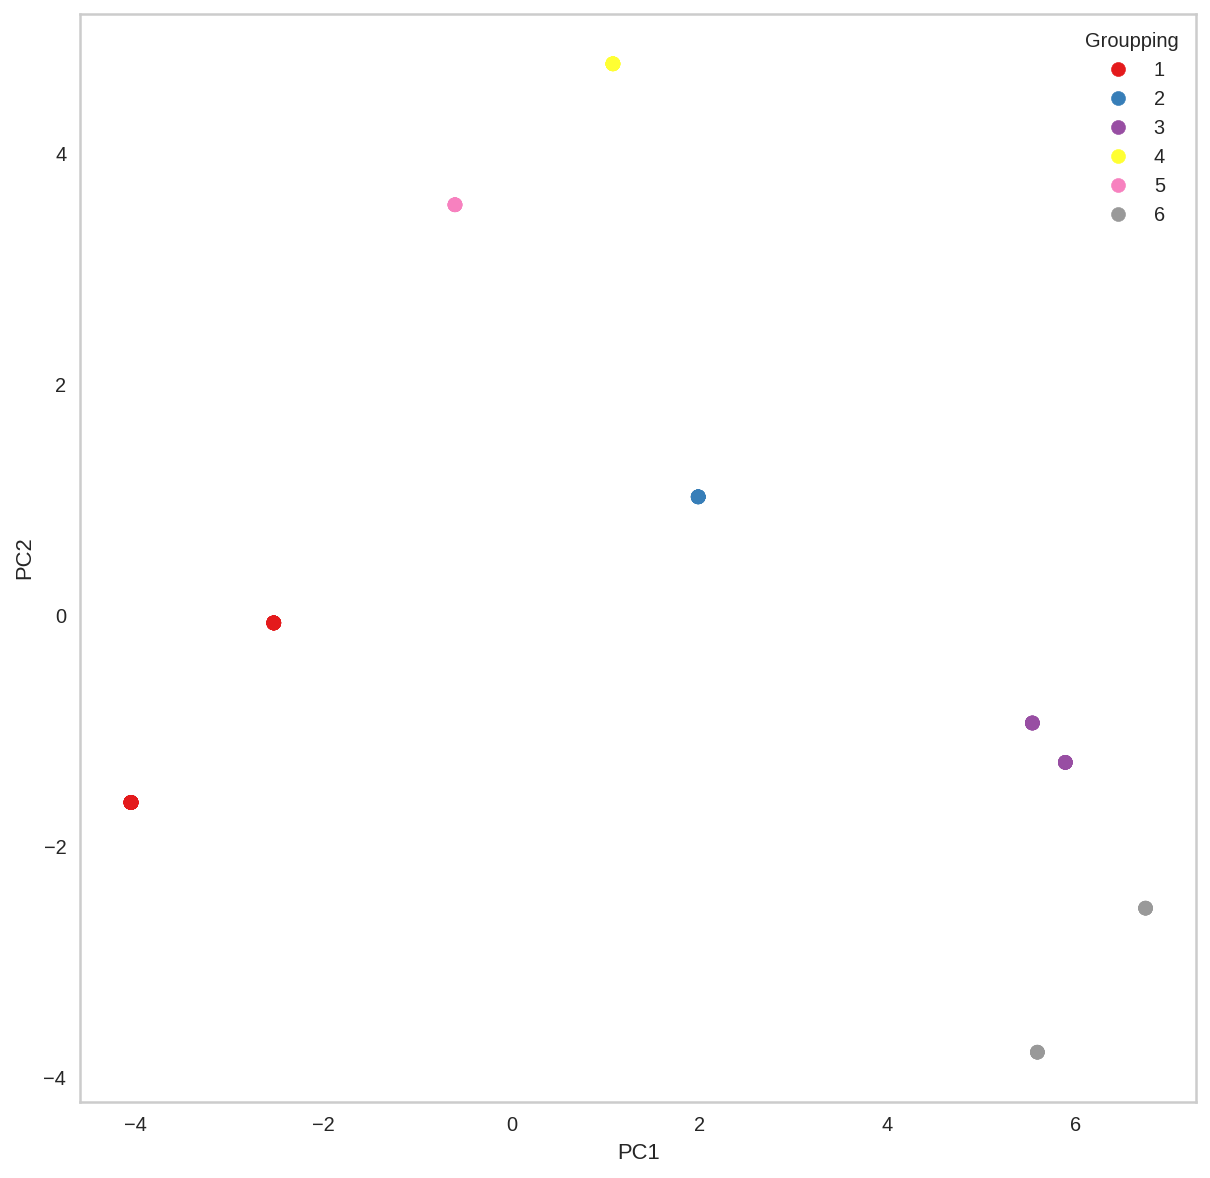

In [60]:
plt.figure(figsize=(10,10))
scatter = plt.scatter(dd['PC1'],dd['PC2'],cmap='Set1', c=Data.Groupping.astype('category').cat.codes)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(b=None)
plt.legend(handles=scatter.legend_elements()[0], 
           labels = ['1','2','3','4','5','6'],
           title = "Groupping")
plt.show()

In [61]:
dpc=pd.DataFrame(pca.components_.T, 
                  index=Data[feature].columns,
                  columns=[f'PC{n+1}' for n in range(pca.components_.shape[0])])
dpc.reset_index(inplace=True)
Rotate_comp = dpc.rename(columns = {'index':'Feature'})
Rotate_comp

,Feature,PC1,PC2
0,Sweetness,-0.160631,-0.139207
1,L,0.131496,0.353316
2,A,0.167580,0.237592
3,B,0.105961,0.328650
4,Total_phenol,-0.083244,0.180684
5,Total_Flavonoid,-0.191816,0.177455
6,Antioxidant,0.144307,0.214421
7,caffeic_acid,0.130856,0.160833
8,Theobromine,-0.026829,-0.314029
9,K,0.174835,-0.007121


In [62]:
PC1_list = dpc['PC1'].tolist()
PC2_list = dpc['PC2'].tolist()
Feature_list = Rotate_comp['Feature'].tolist()

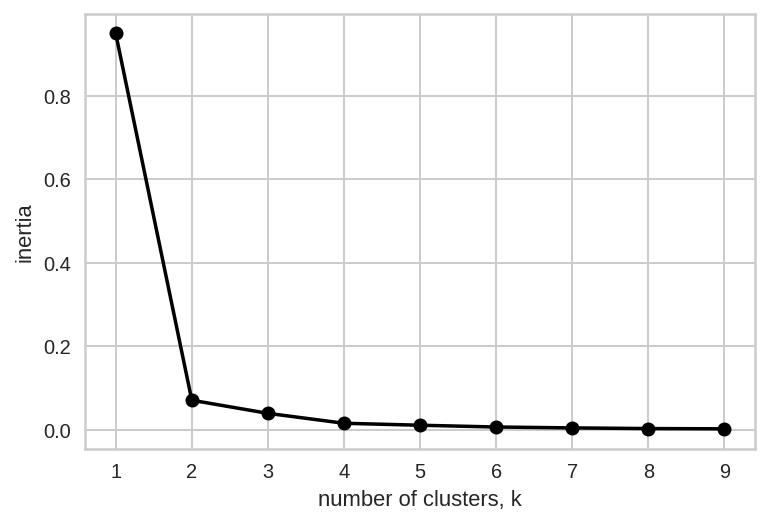

In [73]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(dpc.iloc[:,1:2])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [82]:
kl = KneeLocator(range(1, 10), inertias, curve="convex", direction="decreasing")

kl.elbow

2

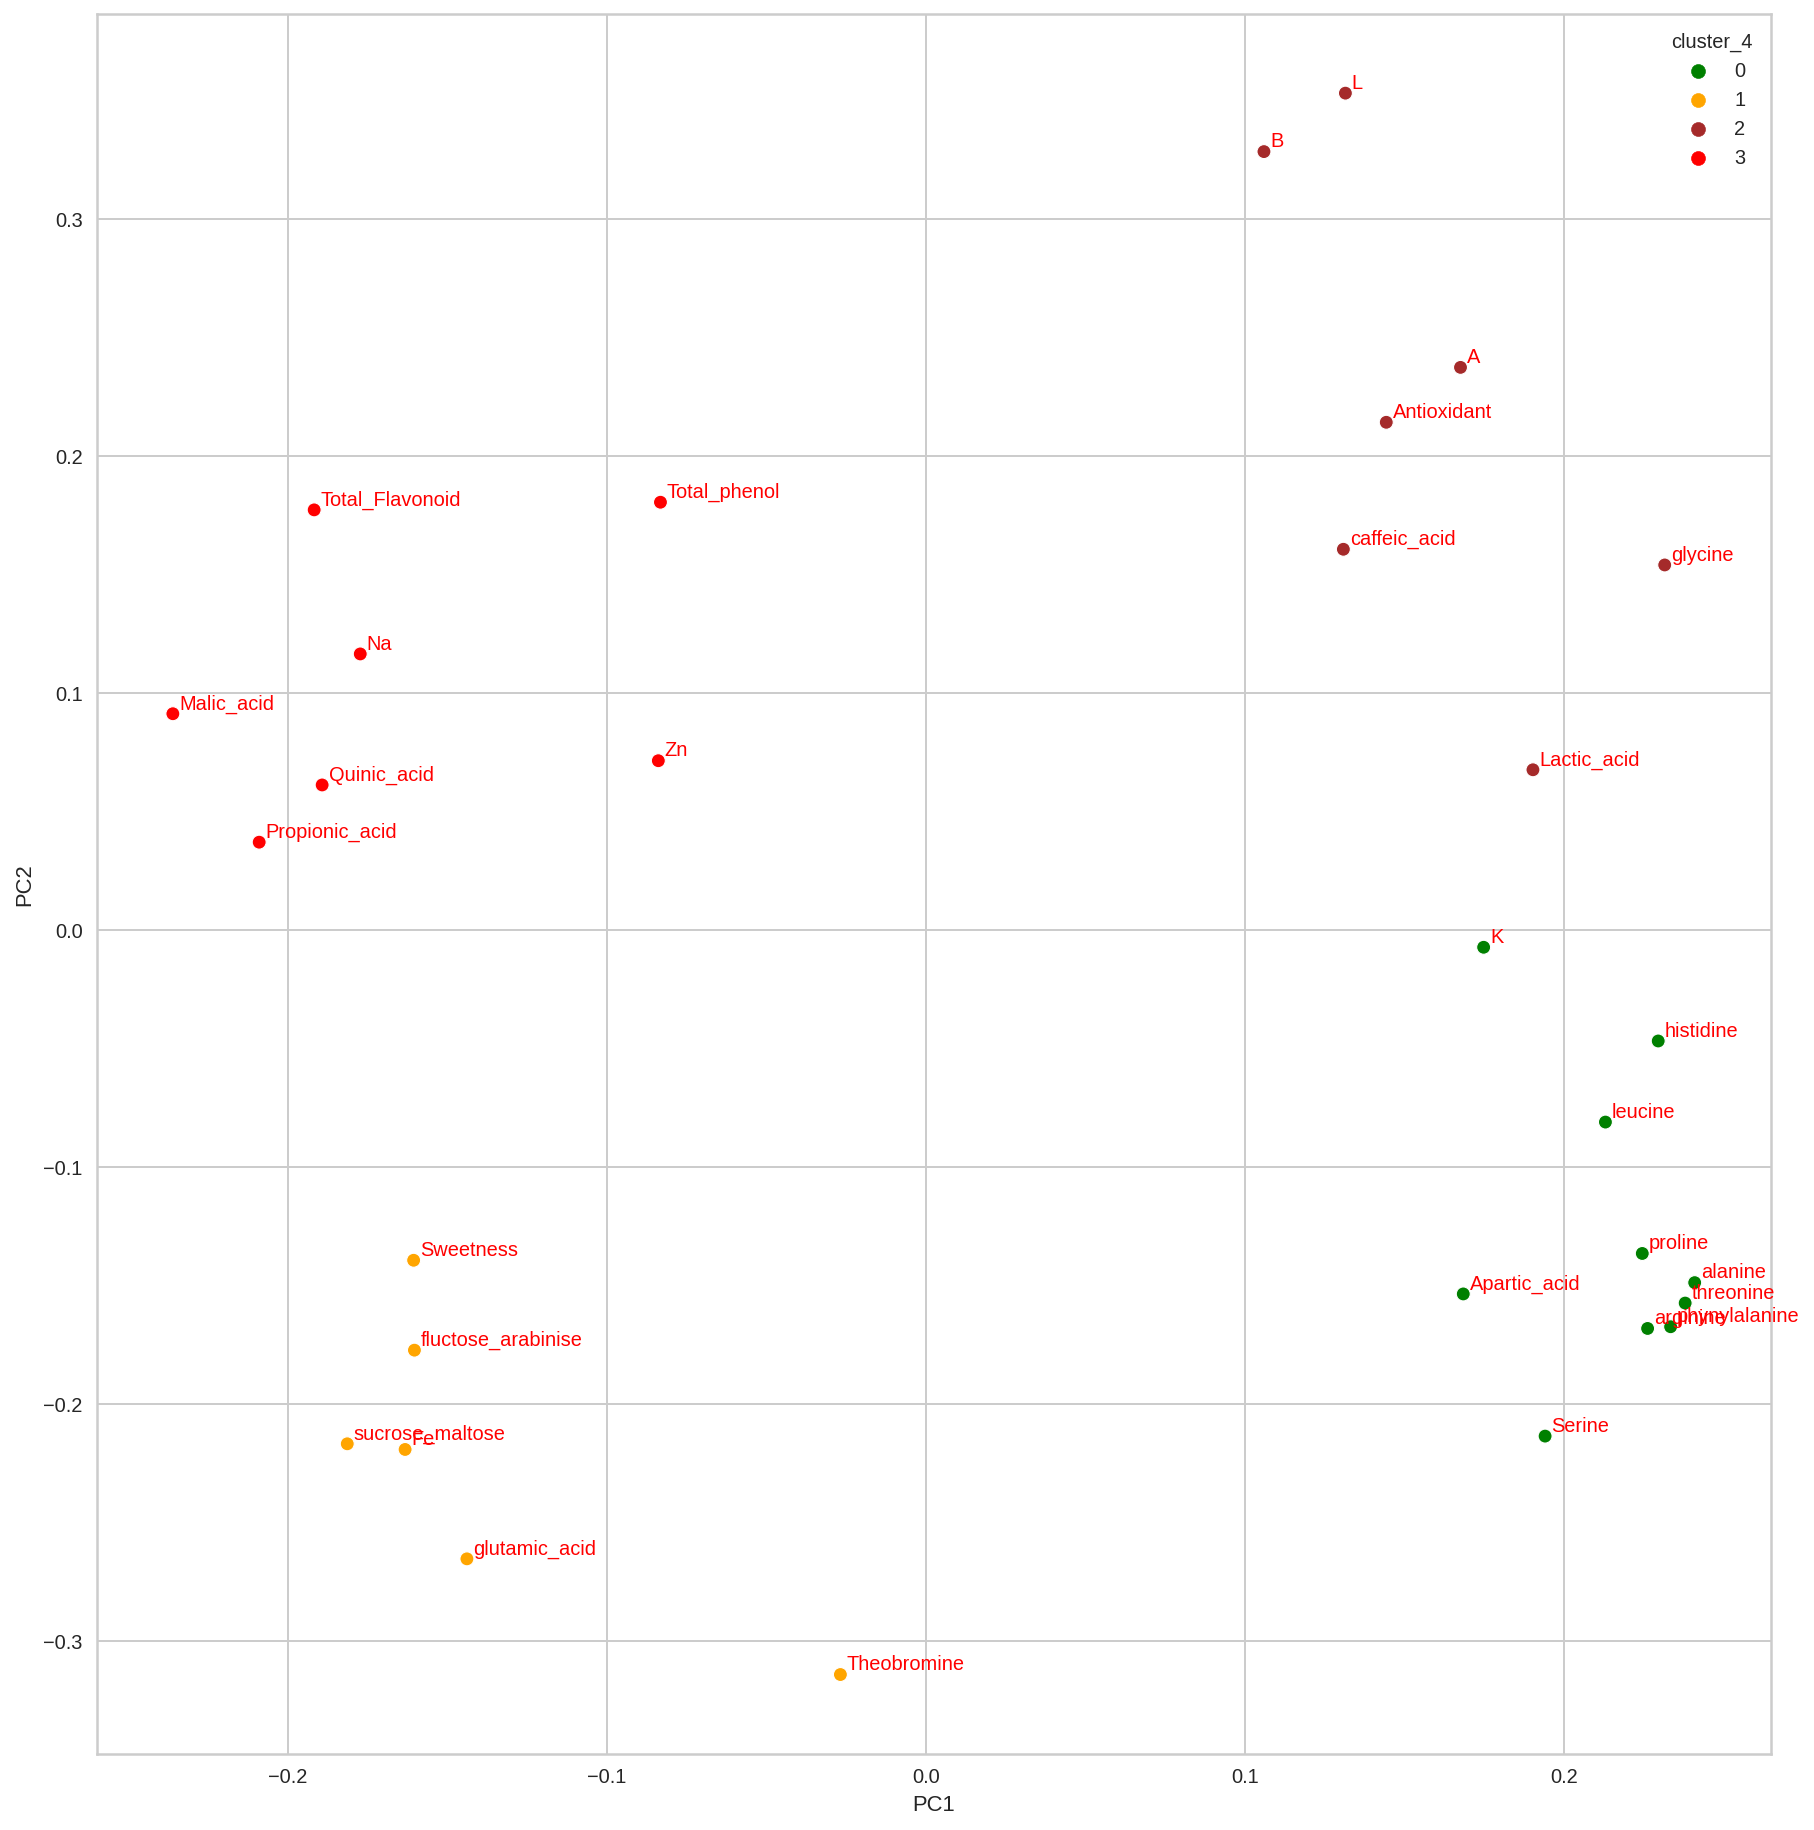

In [98]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(Rotate_comp.iloc[:,1:])

Rotate_comp['cluster_4'] = kmeans.labels_

plt.figure(figsize=(15,16))
ax = sns.scatterplot(data=Rotate_comp,x='PC1',y='PC2', hue = Rotate_comp['cluster_4'],
                     palette=['green','orange','brown','red'])

for i in range(Rotate_comp.shape[0]):
 plt.text(x=Rotate_comp.PC1[i]+0.002,y=Rotate_comp.PC2[i]+0.002,s=Rotate_comp.Feature[i], 
          fontdict=dict(color='red',size=10))

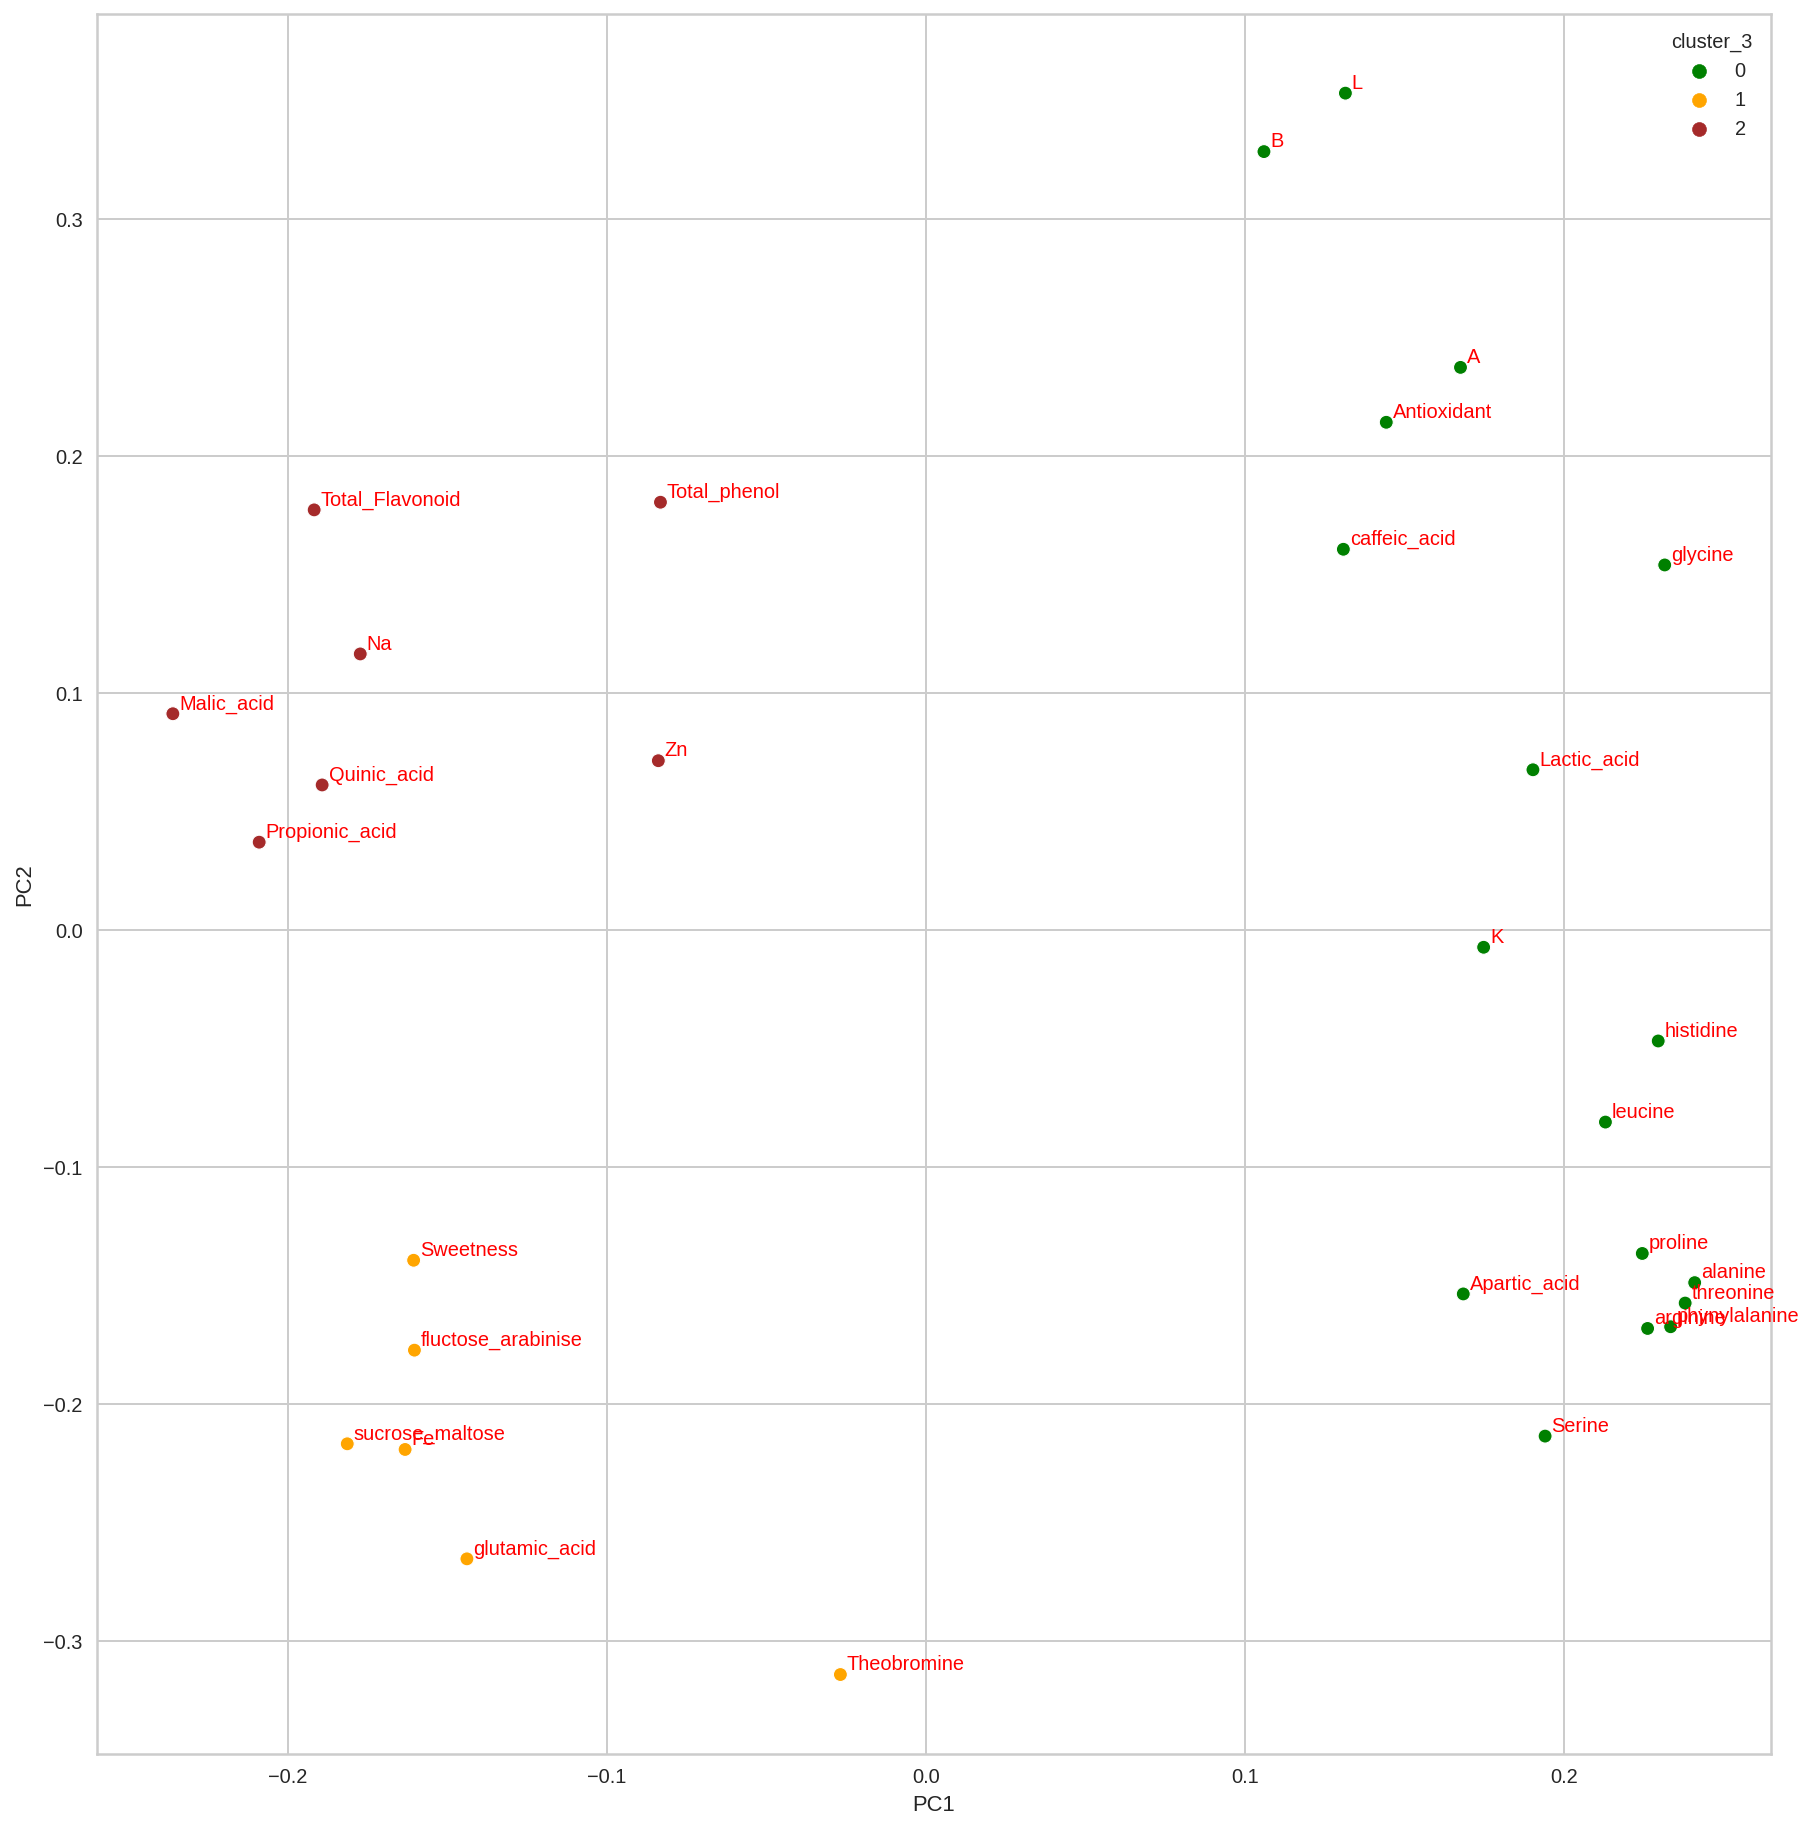

In [105]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(Rotate_comp.iloc[:,1:])

Rotate_comp['cluster_3'] = kmeans.labels_

plt.figure(figsize=(15,16))
ax = sns.scatterplot(data=Rotate_comp,x='PC1',y='PC2', hue = Rotate_comp['cluster_3'],
                     palette=['green','orange','brown'])

for i in range(Rotate_comp.shape[0]):
 plt.text(x=Rotate_comp.PC1[i]+0.002,y=Rotate_comp.PC2[i]+0.002,s=Rotate_comp.Feature[i], 
          fontdict=dict(color='red',size=10))

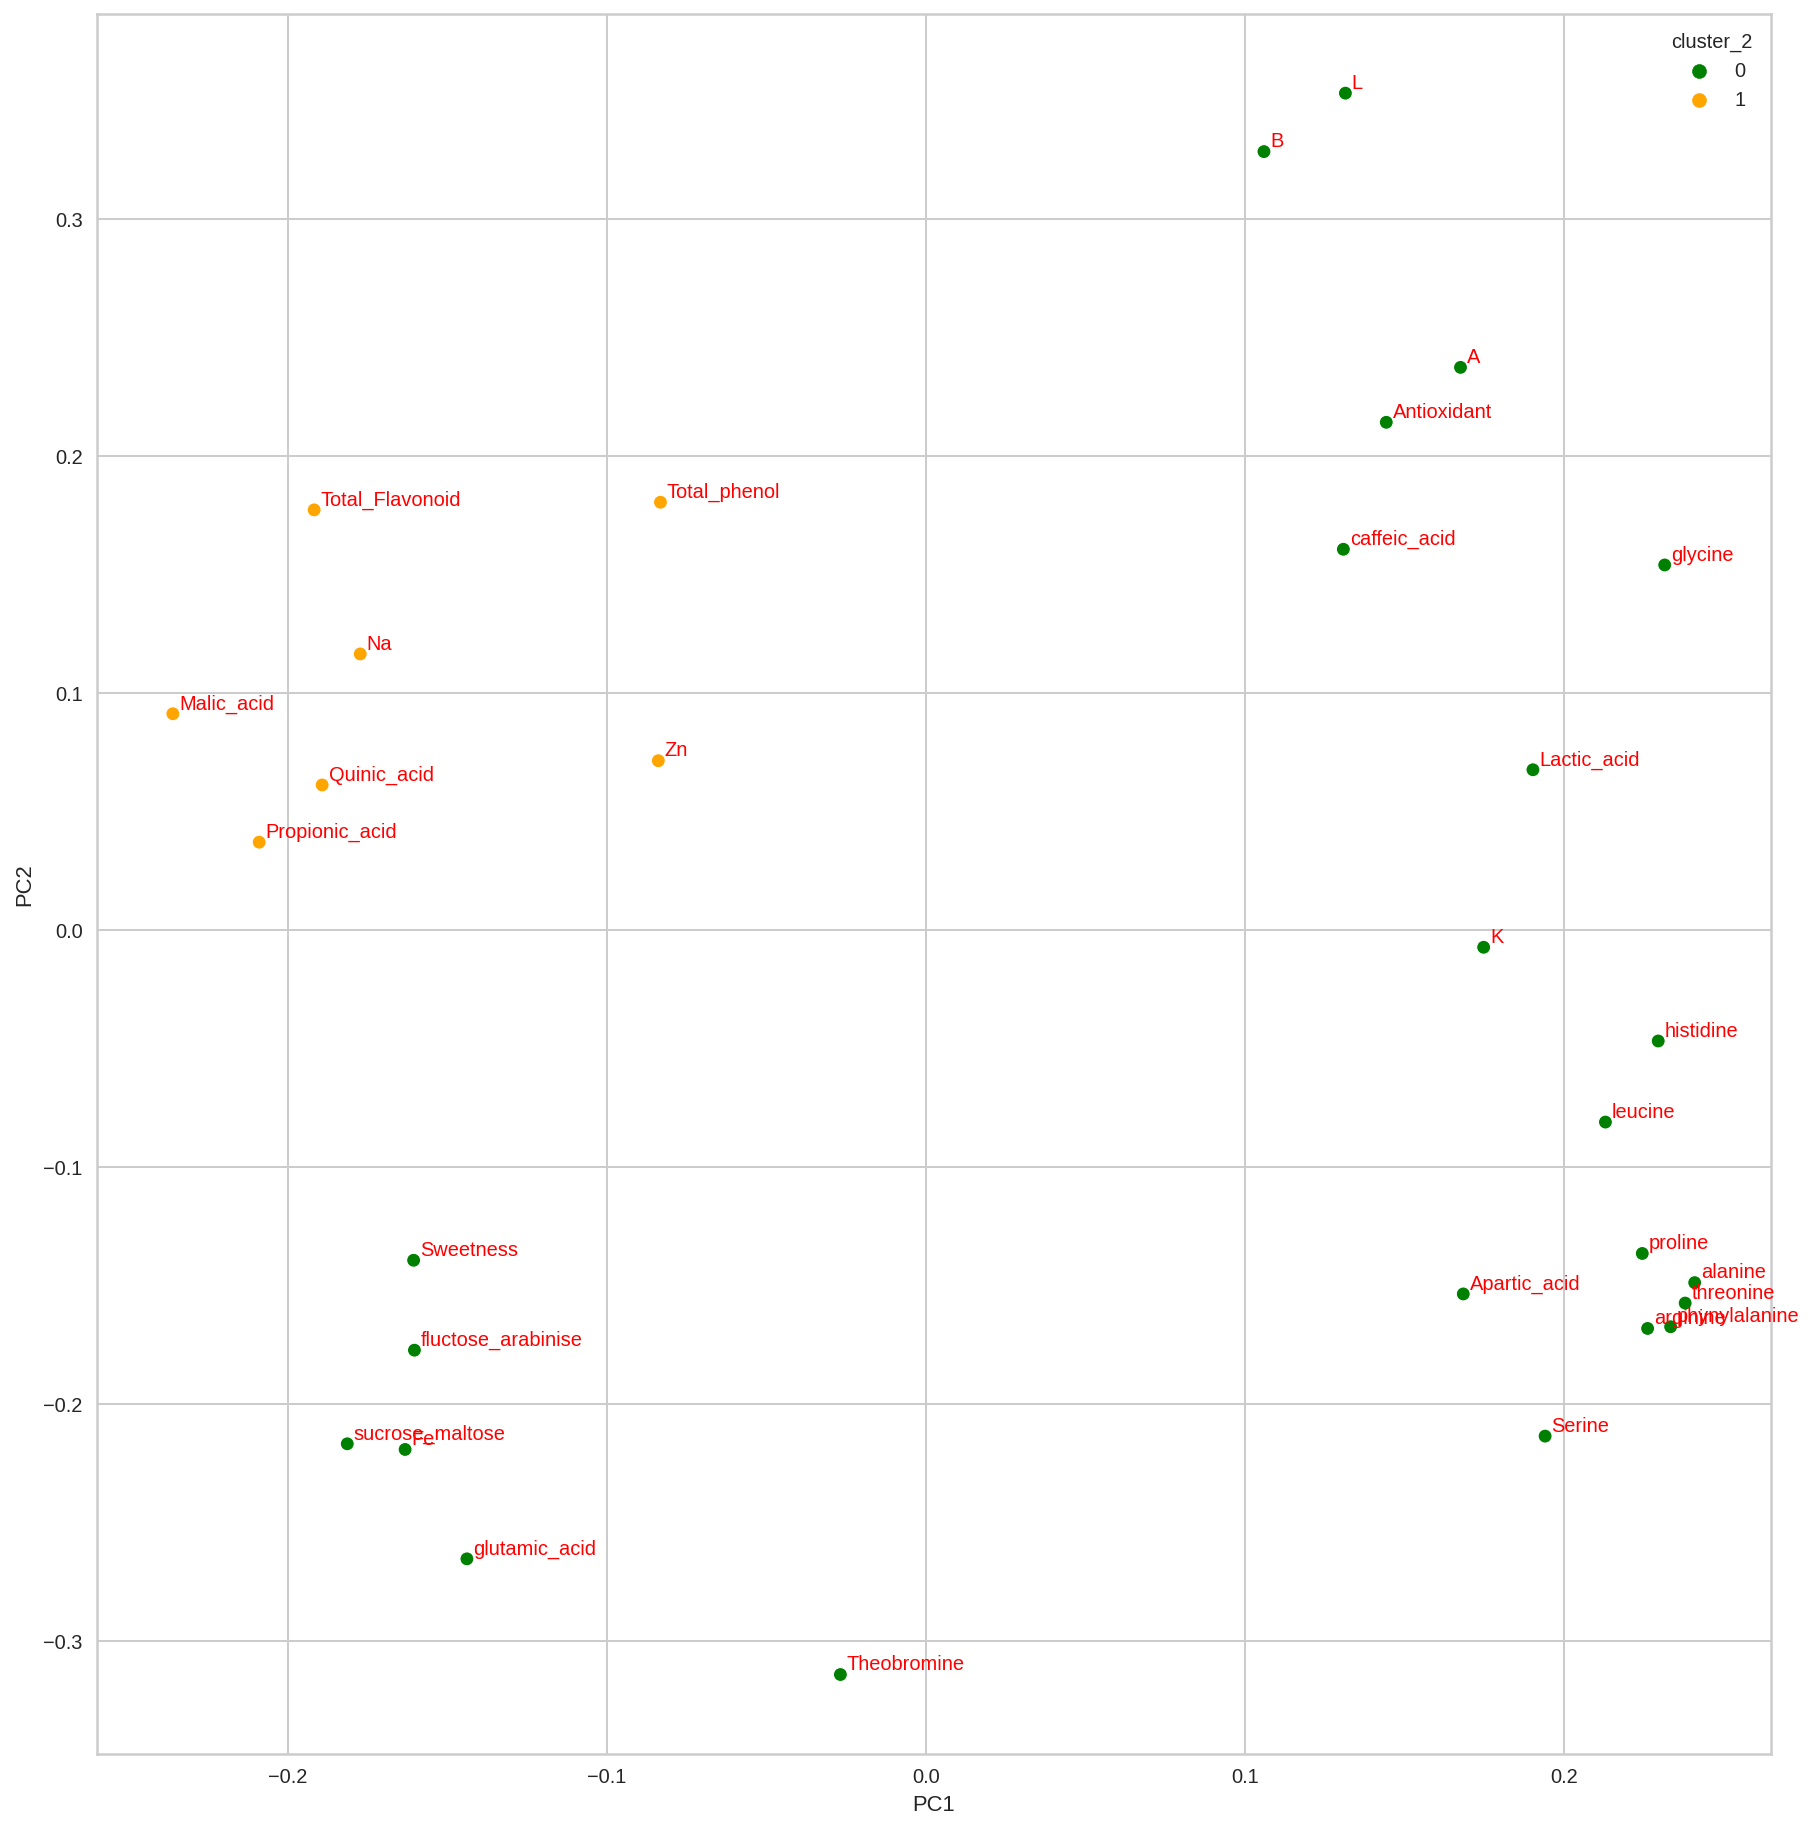

In [107]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(Rotate_comp.iloc[:,1:])

Rotate_comp['cluster_2'] = kmeans.labels_

plt.figure(figsize=(15,16))
ax = sns.scatterplot(data=Rotate_comp,x='PC1',y='PC2', hue = Rotate_comp['cluster_2'],
                     palette=['green','orange'])

for i in range(Rotate_comp.shape[0]):
 plt.text(x=Rotate_comp.PC1[i]+0.002,y=Rotate_comp.PC2[i]+0.002,s=Rotate_comp.Feature[i], 
          fontdict=dict(color='red',size=10))

In [153]:
G2_Group_Feature = Rotate_comp[['Feature','cluster_2']].sort_values(by = ['cluster_2'])
G2_Group_Feature_drop = G2_Group_Feature[G2_Group_Feature['cluster_2'] == 1]
G2_Group_Feature_drop_list = G2_Group_Feature_drop['Feature'].tolist()
G2_Group_Feature_drop_list


['Zn',
 'Na',
 'Malic_acid',
 'Total_Flavonoid',
 'Total_phenol',
 'Propionic_acid',
 'Quinic_acid']

In [154]:
G2_Group_Feature = Rotate_comp[['Feature','cluster_2']].sort_values(by = ['cluster_2'])
G2_Group_Feature_drop = G2_Group_Feature[G2_Group_Feature['cluster_2'] == 0]
G2_Group_Feature_drop_list = G2_Group_Feature_drop['Feature'].tolist()
G2_Group_Feature_drop_list

['arginine',
 'L',
 'Antioxidant',
 'glycine',
 'B',
 'A',
 'phynylalanine',
 'Apartic_acid',
 'leucine',
 'Serine',
 'alanine',
 'threonine',
 'proline',
 'histidine',
 'caffeic_acid',
 'K',
 'Fe',
 'Theobromine',
 'fluctose_arabinise',
 'sucrose_maltose',
 'glutamic_acid',
 'Sweetness',
 'Lactic_acid']

In [155]:
G3_Group_Feature = Rotate_comp[['Feature','cluster_3']].sort_values(by = ['cluster_3'])
G3_Group_Feature_drop = G3_Group_Feature[G3_Group_Feature['cluster_3'] == 0]
G3_Group_Feature_drop_list = G3_Group_Feature_drop['Feature'].tolist()
G3_Group_Feature_drop_list


['arginine',
 'L',
 'Antioxidant',
 'glycine',
 'B',
 'A',
 'phynylalanine',
 'Apartic_acid',
 'leucine',
 'Serine',
 'alanine',
 'threonine',
 'proline',
 'histidine',
 'caffeic_acid',
 'K',
 'Lactic_acid']

In [156]:
G3_Group_Feature = Rotate_comp[['Feature','cluster_3']].sort_values(by = ['cluster_3'])
G3_Group_Feature_drop = G3_Group_Feature[G3_Group_Feature['cluster_3'] == 1]
G3_Group_Feature_drop_list = G3_Group_Feature_drop['Feature'].tolist()
G3_Group_Feature_drop_list

['Fe',
 'Theobromine',
 'fluctose_arabinise',
 'sucrose_maltose',
 'glutamic_acid',
 'Sweetness']

In [157]:
G4_Group_Feature = Rotate_comp[['Feature','cluster_4']].sort_values(by = ['cluster_4'])
G4_Group_Feature_drop = G4_Group_Feature[G4_Group_Feature['cluster_4'] == 2]
G4_Group_Feature_drop_list = G4_Group_Feature_drop['Feature'].tolist()
G4_Group_Feature_drop_list

['Serine',
 'phynylalanine',
 'Apartic_acid',
 'leucine',
 'alanine',
 'arginine',
 'proline',
 'histidine',
 'K',
 'threonine']

In [158]:
G4_Group_Feature = Rotate_comp[['Feature','cluster_4']].sort_values(by = ['cluster_4'])
G4_Group_Feature_drop = G4_Group_Feature[G4_Group_Feature['cluster_4'] == 3]
G4_Group_Feature_drop_list = G4_Group_Feature_drop['Feature'].tolist()
G4_Group_Feature_drop_list

['Lactic_acid', 'A', 'B', 'glycine', 'Antioxidant', 'L', 'caffeic_acid']